<a href="https://colab.research.google.com/github/mrghutchison/Stock_analysis/blob/main/stocks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stock analysis


In [ ]:
%pip install yfinance

     |████████████████████████████████| 5.5MB 5.7MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.55-py2.py3-none-any.whl size=22616 sha256=65bad2c237fd5b4be14e726610580b6b8731c3fcd43b4a41aa4c50702de299f9
  Stored in directory: /root/.cache/pip/wheels/04/98/cc/2702a4242d60bdc14f48b4557c427ded1fe92aedf257d4565c
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
ticker = "BB"
investment = 10000.00
num_years = 10

# Lookup data


In [ ]:
# ticker = input("Which stock ticker :")
# investment = float(input("How much money do you have to invest? :"))
# num_years = int(input("How many years of data do you want to consider? :"))

# Use the [yfinance](https://pypi.org/project/yfinance/) Python package to obtain historical price data


Industry Sector: Technology
Number of Employees: 13775
Initial set of stock data for NVDA
Potential Capital Gain per stock is: $571.85
Buy at $10.46 on 2012-11-16
Sell at $582.31 on 2020-11-06
You could have made at total of $546111.98 in capital gains.


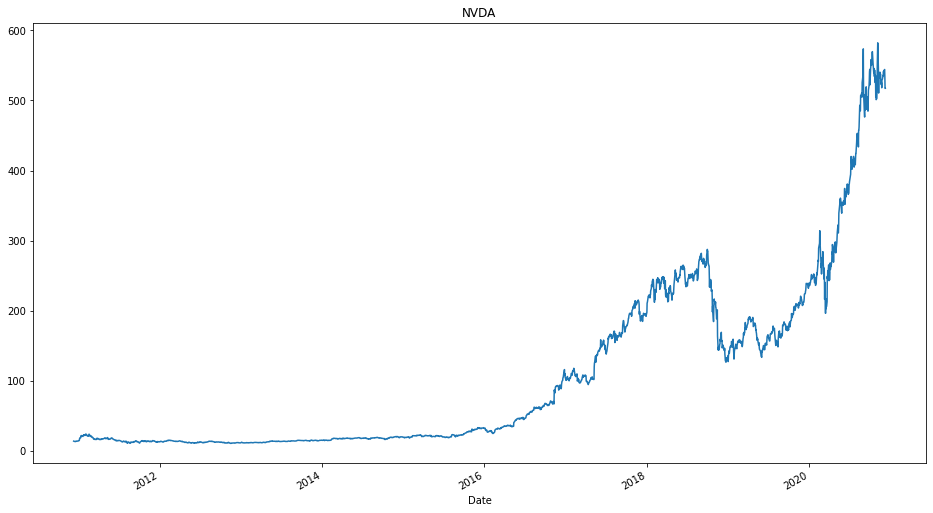

In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

stock = yf.Ticker(ticker)


# get stock info
print("Industry Sector: " + str(stock.info["sector"]) )
print("Number of Employees: " + str(stock.info["fullTimeEmployees"]) )

# get historical market data
period_text = str(num_years) + "y"
hist = stock.history(period=period_text)

print ("Initial set of stock data for " + ticker)

prices = hist["Close"]
hist.head()

# find optimal purchase and selling price
data = pd.Series.to_list(hist["Close"])

num_prices = len(data)
min_price = data[0]
max_price = data[0]
max_profit = 0

# Nested for loop technique to find the maximum profit
#for i in range(num_prices-1):
 #for j in range(i+1, num_prices):
  #new_diff = data[j]-data[i]
  #if (new_diff>max_diff):
   #max_diff=new_diff
   #min_price = data[i]
   #min_index = i
   #max_price = data[j]
   #max_index = j
   
for i in range(num_prices):
 profit = data[i]-min_price
 
 if data[i] <= min_price:
  min_price = data[i]
  potential_min_index = i 
  
 if (profit>max_profit):
  min_index = potential_min_index
  max_profit = profit
  max_index = i

print ("Potential Capital Gain per stock is: ${:.2f}".format(max_profit))

# Determine the best purchase and selling price
purchase = hist.iloc[min_index]
sell = hist.iloc[max_index]

# The purchase/sell objects are indexed by Timestamp
purchase_text = "Buy at ${:.2f} on {}".format(purchase.Close,purchase.name.date())
sell_text = "Sell at ${:.2f} on {}".format(sell.Close, sell.name.date())

print (purchase_text)
print (sell_text)

# How many stocks could you purchase with the investment amount
num_stocks_purchased = int(investment/purchase.Close) 
capital_gains = num_stocks_purchased * max_profit

print ("You could have made at total of ${:.2f} in capital gains.".format(capital_gains))
 
# Generate a plot based on the Closing prices over time
hist['Close'].plot(figsize=(16, 9), title=ticker )